In [2]:
# import libraries for data analysis
import numpy as np
import pandas as pd 

# import Libraries for data visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data from the dataset into dataframe
age_group_details = pd.read_csv('AgeGroupDetails.csv')
covid_19_india = pd.read_csv('covid_19_india.csv')
hospital_beds_india = pd.read_csv('HospitalBedsIndia.csv')
icmr_testing_labs = pd.read_csv('ICMRTestingLabs.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
population_india_census = pd.read_csv('population_india_census2011.csv')
state_wise_testing_details = pd.read_csv('StatewiseTestingDetails.csv')

In [ ]:
# print(population_india_census['State / Union Territory'],"\n\n")
# print(individual_details['detected_district'],"\n\n")
# print(individual_details['detected_state'],"\n\n")

In [4]:
# update the state name for Teleangana
population_india_census['State / Union Territory'] = population_india_census['State / Union Territory'].apply(lambda name : 'Telangana' if name == 'Telengana' else name)

#update the distrct name for Ahmedabad
individual_details['detected_district'] = individual_details['detected_district'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

#update the city name for Ahmedabad
individual_details['detected_city'] = individual_details['detected_city'].apply(lambda name : 'Ahmedabad' if name == 'Ahmadabad' else name)

In [ ]:
# print(population_india_census['State / Union Territory'],"\n\n")
# print(individual_details['detected_district'],"\n\n")
# print(individual_details['detected_state'],"\n\n")

In [5]:
date_cumulative = covid_19_india.groupby('Date').sum()
date_cumulative.reset_index(inplace = True)

# Change the date format to 'YYYY-MM-DD'
date_cumulative['Date'] = date_cumulative['Date'].apply(lambda date : '20' + '-'.join(date.split('/')[::-1]))

# Sort the rows by rate (in ascending order)
date_cumulative.sort_values('Date', inplace = True)

# Calculate the number of active cases
date_cumulative['Active'] = date_cumulative['Confirmed'] - (date_cumulative['Cured'] + date_cumulative['Deaths'])

date_cumulative = date_cumulative[['Date', 'Confirmed', 'Cured', 'Deaths', 'Active']]

# Dataframe with number of cases (categorised by current health status) grouped by date 
date_cumulative.head()

,Date,Confirmed,Cured,Deaths,Active
116,2020-01-30,1,0,0,1
119,2020-01-31,1,0,0,1
0,2020-02-01,2,0,0,2
4,2020-02-02,3,0,0,3
8,2020-02-03,3,0,0,3


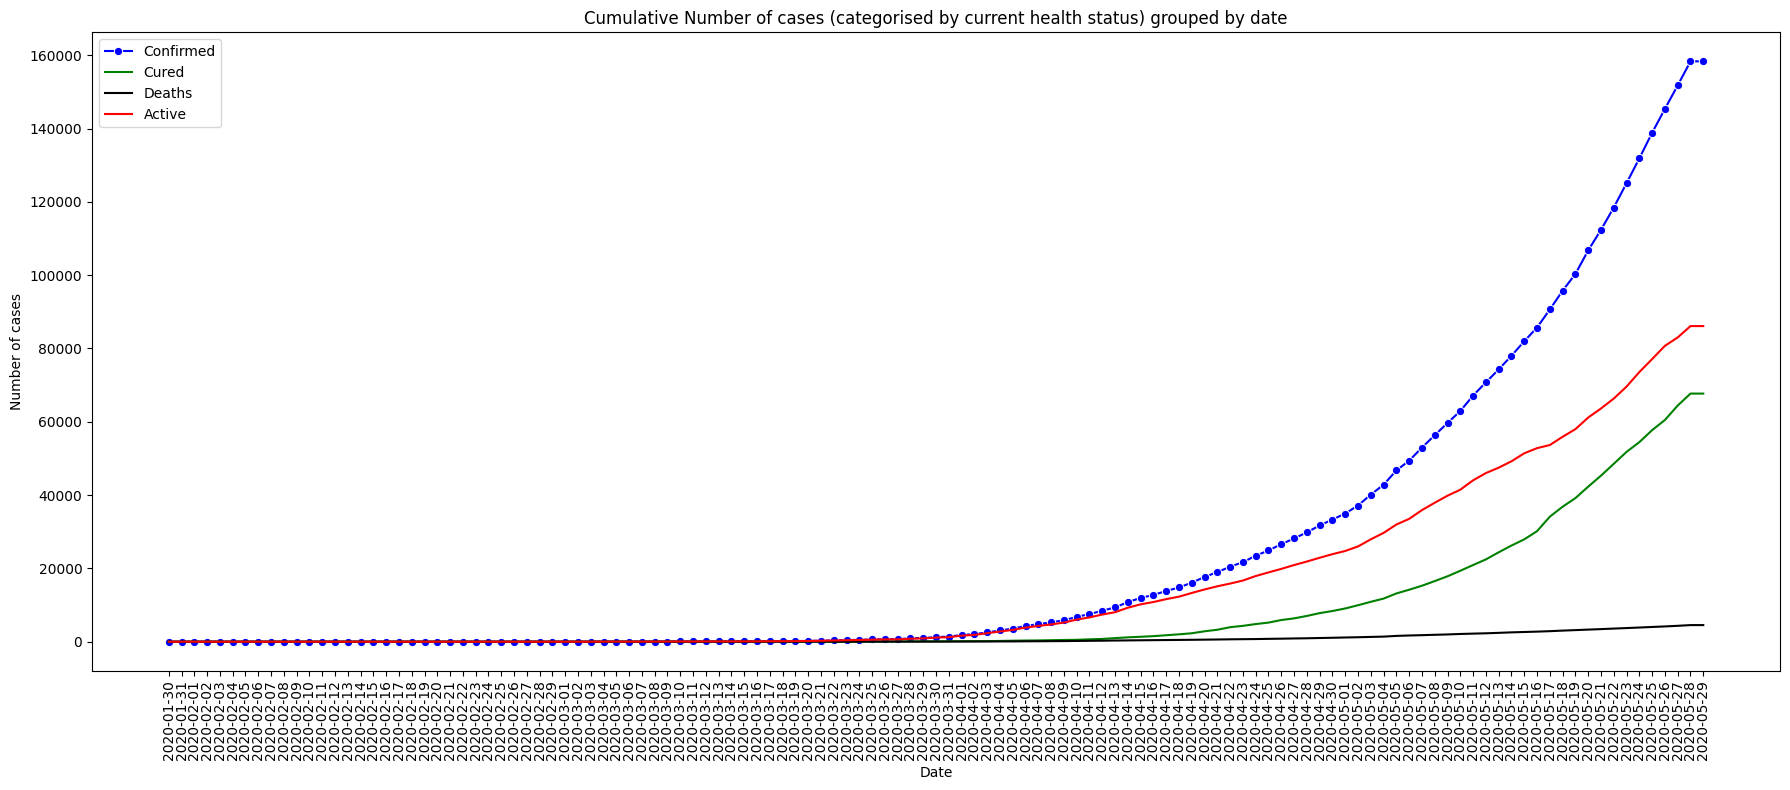

In [7]:
plt.figure(figsize=(18, 8), dpi=100)
sns.lineplot(x='Date', y='Confirmed', data= date_cumulative, label= 'Confirmed', color = 'blue', marker = 'o')
sns.lineplot(x='Date', y='Cured', data= date_cumulative, label= 'Cured', color = 'green')
sns.lineplot(x='Date', y='Deaths', data= date_cumulative, label= 'Deaths', color = 'black')
sns.lineplot(x='Date', y='Active', data= date_cumulative, label= 'Active', color = 'red')
plt.title('Cumulative Number of cases (categorised by current health status) grouped by date')
plt.ylabel('Number of cases')
plt.legend(loc = 0)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [ ]:
print(sns.__version__)
print(pd.__version__)